In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None) 

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
from navara.training.models import k_means
from navara.preprocessing import get_df, get_original_df

In [3]:
df = get_original_df('../data/')

INFO:navara.utils:[get_original_df   ] shape=(16666, 63),  time=0:00:00.387754


In [4]:
X = get_df('../data/')

INFO:navara.utils:[get_df            ] shape=(16666, 62),  time=0:00:00.382984


In [5]:
X.head()

,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd,gemeentenaam_regio
0,5.407172,0.0,4.709530,4.709530,3.583519,3.433987,3.713572,4.262680,3.828641,4.394449,2.772589,3.583519,3.583519,3.258097,3.295837,4.532599,6.052089,90.0,8.0,0.000000,2.197225,1.098612,3.295837,3.295837,68.410526,5420.0,NaN,4550.0,48.476799,2860.0,NaN,2190.0,5.303305,NaN,NaN,0.000000,4.510860,3.583519,6.753438,5.0,5.463832,3.583519,2.397895,1.791759,2.397895,0.000000,1.791759,1.791759,0.000000,1.0,2.397895,3.295837,4.110874,0.000000,4.510860,3.044522,5.049856,930.0,6.685861,6.447306,5.303305,LoonopZandBuurt
1,6.953684,0.0,6.284134,6.226537,5.303305,5.049856,5.655992,5.673323,4.753590,6.111467,5.170484,4.564348,5.252273,3.135494,8.696176,6.082219,4.875197,24.0,76.0,4.276666,1.791759,0.000000,2.302585,2.302585,49.699095,NaN,7.705262,3280.0,28.982753,NaN,790.0,980.0,6.685861,24.637370,8.717798,4.709530,5.463832,4.262680,2.890372,1.0,7.997327,3.931826,0.000000,1.791759,2.397895,2.397895,1.791759,1.791759,2.772589,1.0,NaN,NaN,NaN,0.000000,4.510860,6.186209,6.122493,520.0,8.125927,7.989899,6.089045,DordrechtBuurt
2,7.425358,0.0,6.786717,6.673298,5.673323,5.327876,5.902633,6.329721,5.545177,6.587550,5.484797,5.420535,5.564520,3.135494,4.094345,6.621406,4.934474,76.0,23.0,2.772589,2.197225,0.693147,1.945910,1.945910,51.865210,2930.0,7.595890,2900.0,40.000000,1770.0,1330.0,1690.0,7.170888,19.052559,12.767145,3.433987,6.463029,5.484797,7.952967,5.0,4.394449,5.198497,3.713572,3.433987,3.583519,2.772589,2.397895,3.583519,3.258097,1.0,4.262680,2.944439,5.631212,1.098612,4.836282,4.394449,5.225747,710.0,8.625330,8.425297,6.908755,hetBildtWijk
3,4.905275,0.0,4.262680,4.110874,3.258097,3.044522,3.258097,3.931826,2.397895,3.828641,2.397895,2.772589,3.258097,3.401197,6.079933,3.912023,NaN,84.0,14.0,0.000000,2.708050,1.098612,3.688879,3.688879,71.554175,5450.0,NaN,4830.0,47.010637,2410.0,NaN,2050.0,4.615121,NaN,NaN,0.000000,4.510860,4.454347,3.465736,4.0,6.284134,4.795791,0.000000,3.713572,3.828641,2.397895,3.044522,1.791759,0.000000,1.0,1.945910,2.484907,2.708050,0.693147,2.397895,0.000000,3.713572,375.0,6.089045,5.993961,3.713572,OudewaterBuurt
4,5.831882,0.0,5.017280,5.225747,3.044522,3.258097,4.025352,4.510860,4.948760,5.545177,5.278115,3.583519,3.258097,2.564949,7.341484,5.605802,4.394449,11.0,66.0,3.433987,3.637586,3.178054,0.000000,0.000000,45.166359,NaN,7.659171,1940.0,30.495901,NaN,960.0,930.0,5.707110,29.647934,0.000000,3.433987,4.510860,1.791759,3.135494,2.0,7.475339,0.00

## Load trained model

In [6]:
import joblib

model = joblib.load(open('../trained_models/model_1.joblib', 'rb'))

In [7]:
model

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('dtypeselector',
                                                                  DTypeSelector(dtypes='number')),
                                                                 ('corrfilterhightotalcorrelation',
                                                                  CorrFilterHighTotalCorrelation()),
                                                                 ('knnimputer',
                                                                  KNNImputer()),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('dtypeselector',
                                          

In [8]:
y_km = model.predict(X)

In [9]:
def merge_clusters(df, clusters_array):
    return df.assign(
        cluster = lambda d: clusters_array
    )

In [10]:
df = merge_clusters(df, y_km)

In [11]:
df.head()

,gemeentenaam,soort_regio,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd,cluster
0,LoonopZand,Buurt,222.0,0.0,110.0,110.0,35.0,30.0,40.0,70.0,45.0,80.0,15.0,35.0,35.0,26.0,26.0,92.0,425.0,90.0,8.0,0.0,8.0,2.0,74.0,26.0,4680.0,5420.0,NaN,4550.0,2350.0,2860.0,NaN,2190.0,200.0,NaN,NaN,0.0,90.0,35.0,856.0,5.0,235.0,35.0,10.0,5.0,10.0,0.0,5.0,5.0,0.0,1.0,10.0,26.0,60.0,0.0,90.0,20.0,155.0,930.0,800.0,630.0,200.0,5
1,Dordrecht,Buurt,1046.0,0.0,535.0,505.0,200.0,155.0,285.0,290.0,115.0,450.0,175.0,95.0,190.0,23.0,5979.0,437.0,131.0,24.0,76.0,71.0,5.0,0.0,91.0,9.0,2470.0,NaN,2220.0,3280.0,840.0,NaN,790.0,980.0,800.0,607.0,76.0,110.0,235.0,70.0,17.0,1.0,2972.0,50.0,0.0,5.0,10.0,10.0,5.0,5.0,15.0,1.0,NaN,NaN,NaN,0.0,90.0,485.0,455.0,520.0,3380.0,2950.0,440.0,2
2,hetBildt,Wijk,1677.0,0.0,885.0,790.0,290.0,205.0,365.0,560.0,255.0,725.0,240.0,225.0,260.0,23.0,59.0,750.0,139.0,76.0,23.0,15.0,8.0,1.0,94.0,6.0,2690.0,2930.0,1990.0,2900.0,1600.0,1770.0,1330.0,1690.0,1300.0,363.0,163.0,30.0,640.0,240.0,2843.0,5.0,80.0,180.0,40.0,30.0,35.0,15.0,10.0,35.0,25.0,1.0,70.0,18.0,278.0,2.0,125.0,80.0,185.0,710.0,5570.0,4560.0,1000.0,4
3,Oudewater,Buurt,134.0,0.0,70.0,60.0,25.0,20.0,25.0,50.0,10.0,45.0,10.0,15.0,25.0,30.0,436.0,49.0,NaN,84.0,14.0,0.0,14.0,2.0,61.0,39.0,5120.0,5450.0,NaN,4830.0,2210.0,2410.0,NaN,2050.0,100.0,NaN,NaN,0.0,90.0,85.0,31.0,4.0,535.0,120.0,0.0,40.0,45.0,10.0,20.0,5.0,0.0,1.0,6.0,11.0,14.0,1.0,10.0,0.0,40.0,375.0,440.0,400.0,40.0,5
4,Heerlen,Buurt,340.0,0.0,150.0,185.0,20.0,25.0,55.0,90.0,140.0,255.0,195.0,35.0,25.0,13.0,1542.0,271.0,81.0,11.0,66.0,30.0,37.0,23.0,100.0,0.0,2040.0,NaN,2120.0,1940.0,930.0,NaN,960.0,930.0,300.0,879.0,0.0,30.0,90.0,5.0,22.0,2.0,1763.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,55.0,445.0,445.0,1690.0,1280.0,740.0,540.0,1


-----

# How to evaluate the characteristics of a segmentation?

We will look at the following characteristics to provide insights of each segmentation.

1. Grootte van het segment
2. Verschil tussen man en vrouw (pie chart)
3. Gemiddelde leeftijd (inwoners_vanaf_de_aow_leeftijd)
4. Verdeling van soort_regio
5. Verdeling van type huishouden
6. Totaal aantal woningen: woningvoorraad
7. Verdeling koopwoningen vs huurwoningen 
8. Gemiddelde in_bezit_woningcorporatie
9. gemiddeld_elektriciteitsverbruik_totaal

Voor de laadpalen:
10. personenautos_brandstof_benzine vs personenautos_overige_brandstof
11. totaal_aantal_laadpalen

Voor zonnepanelen:
11. aantal_installaties_bij_woningen

# Cluster 1: ....

In [22]:
df_1 = df.loc[lambda d: d['cluster']==1]
df_2 = df.loc[lambda d: d['cluster']==2]

In [13]:
df_1

,gemeentenaam,soort_regio,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd,cluster
4,Heerlen,Buurt,340.0,0.0,150.0,185.0,20.0,25.0,55.0,90.0,140.0,255.0,195.0,35.0,25.0,13.0,1542.0,271.0,81.0,11.0,66.0,30.0,37.0,23.0,100.0,0.0,2040.0,NaN,2120.0,1940.0,930.0,NaN,960.0,930.0,300.0,879.0,0.0,30.0,90.0,5.0,22.0,2.0,1763.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,55.0,445.0,445.0,1690.0,1280.0,740.0,540.0,1
11,Etten-Leur,Buurt,206.0,0.0,110.0,90.0,0.0,15.0,50.0,70.0,70.0,15.0,15.0,5.0,0.0,12.0,2095.0,94.0,NaN,0.0,98.0,0.0,98.0,2.0,77.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,5.0,0.0,10.0,2.0,1818.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,15.0,130.0,1720.0,1305.0,790.0,540.0,250.0,1
16,Amsterdam,Buurt,2917.0,0.0,1525.0,1385.0,365.0,220.0,935.0,780.0,620.0,1715.0,1000.0,385.0,340.0,16.0,4222.0,1653.0,137.0,42.0,57.0,20.0,37.0,1.0,100.0,0.0,2030.0,NaN,1890.0,2210.0,1170.0,NaN,1200.0,1140.0,2300.0,459.0,94.0,60.0,915.0,115.0,69.0,2.0,2022.0,175.0,0.0,15.0,20.0,40.0,10.0,65.0,25.0,1.0,NaN,NaN,NaN,0.0,120.0,100.0,155.0,940.0,10030.0,7660.0,2380.0,1
28,Amsterdam,Buurt,2179.0,0.0,975.0,1200.0,215.0,290.0,960.0,445.0,270.0,1370.0,820.0,340.0,220.0,16.0,8431.0,1229.0,327.0,21.0,79.0,13.0,66.0,0.0,100.0,0.0,1970.0,NaN,1860.0,2300.0,1060.0,3980.0,1030.0,1180.0,1900.0,520.0,178.0,60.0,535.0,100.0,26.0,1.0,4991.0,295.0,0.0,15.0,35.0,35.0,25.0,105.0,75.0,1.0,9.0,10.0,21.0,NaN,85.0,115.0,120.0,530.0,7880.0,6820.0,1060.0,1
31,Diemen,Buurt,1985.0,0.0,1035.0,945.0,285.0,280.0,425.0,720.0,280.0,825.0,225.0,255.0,355.0,24.0,3977.0,811.0,311.0,53.0,47.0,0.0,47.0,0.0,99.0,1.0,3250.0,NaN,2720.0,3710.0,1220.0,NaN,1100.0,1320.0,1600.0,215.0,393.0,0.0,725.0,150.0,50.0,3.0,1196.0,175.0,0.0,5.0,30.0,25.0,25.0,65.0,20.0,1.0,63.0,12.0,159.0,1.0,75.0,5.0,125.0,615.0,6810.0,5750.0,1060.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16640,Amersfoort,Wijk,217.0,0.0,110.0,105.0,25.0,50.0,65.0,55.0,35.0,110.0,50.0,30.0,20.0,20.0,48.0,146.0,254.0,34.0,43.0,0.0,43.0,23.0,98.0,2.0,3690.0,4810.0,3410.0,4540.0,1460.0,3010.0,2630.0,2490.0,200.0,443.0,179.0,0.0,235.0,405.0,451.0,3.0,1250.0,615.0,5.0,95.0,165.0,90.0,70.0,150.0,35.0,1.0,NaN,NaN,NaN,1.0,50.0,90.0,160.0,565.0,870.0,760.0,120.0,1
16643,DeBilt,Buurt,1363.0,0.0,670.0,685.0

In [27]:
def get_segmentation_characteristics(df_segment):
    segment_size = len(df_segment)
    
    
    print(f'Size of segment: {segment_size}')

In [28]:
get_segmentation_characteristics(df_1)

Size of segment: 2184


In [18]:
df['gemeentenaam'].nunique()

388

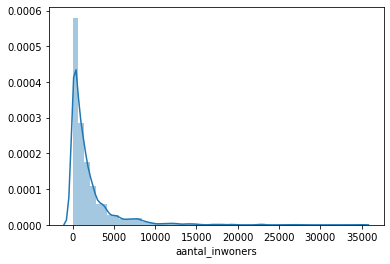

In [14]:
sns.distplot(df_1['aantal_inwoners'])

1. Grootte van het segment
2. Verschil tussen man en vrouw (pie chart)
3. Gemiddelde leeftijd (inwoners_vanaf_de_aow_leeftijd)
4. Verdeling van soort_regio
5. Verdeling van type huishouden
6. Totaal aantal woningen: woningvoorraad
7. Verdeling koopwoningen vs huurwoningen 
8. Gemiddelde in_bezit_woningcorporatie
9. gemiddeld_elektriciteitsverbruik_totaal

Voor de laadpalen:
10. personenautos_brandstof_benzine vs personenautos_overige_brandstof
11. totaal_aantal_laadpalen

Voor zonnepanelen:
11. aantal_installaties_bij_woningen